# Homework

In [9]:
#imports
import numpy as np
import matplotlib.pyplot as plt

## Problem 1

Let $f(x) = 2\sin x - \cos{2x}$. Write a function `beauty_derivative_plot` that takes a point $x$ and plots the function $f(x)$ and its derivative $f'(x)$ in the range $x \in [-2\pi, 2\pi]$. The function should also plot the tangent line to the function at the point $x$.

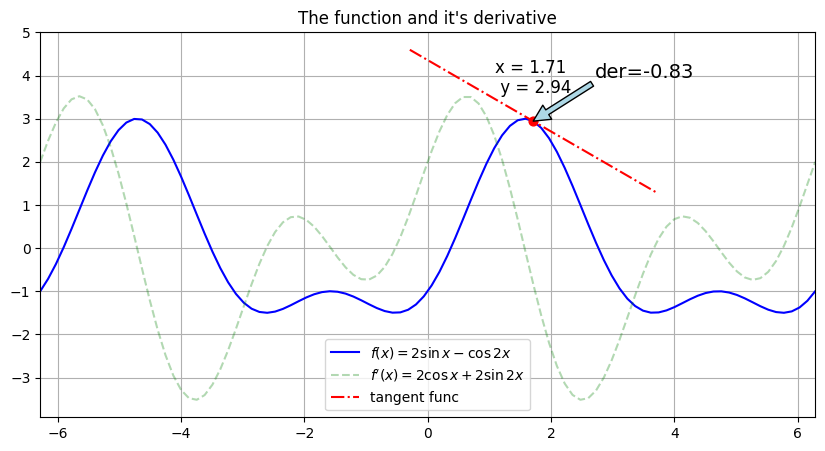

In [10]:
def beauty_derivative_plot(x):
  t = np.linspace(-2*np.pi, 2*np.pi, 100)
  y = 2*np.sin(x) - np.cos(2*x)
  y_func = 2*np.sin(t) - np.cos(2*t)
  y_der = 2*np.cos(t) +2*np.sin(2*t)
  t_for_tangent = np.linspace(x-2,x+2,50)
  der = 2*np.cos(x) +2*np.sin(2*x)
  y_tangent = 2*np.sin(x) - np.cos(2*x) + der*(t_for_tangent - x)
  plt.figure(figsize=(10,5))
  plt.xlim(-2*np.pi, 2*np.pi)
  line1, line2, line3 = plt.plot(t, y_func, t, y_der, t_for_tangent, y_tangent)
  plt.annotate(f"der={round(der,2)}", xy=(x, y), xytext=(x+1,y+1),
                           color="black", weight="medium", fontsize=14,
                           arrowprops={"facecolor": "lightblue"})
  plt.grid()
  line1.set_color("blue")
  line2.set_linestyle("--")
  line2.set_color("green")
  line2.set_alpha(0.3)
  line1.set_label("$f(x) = 2\sin x - \cos{2x}$")
  line2.set_label("$f'(x) = 2\cos x + 2\sin{2x}$")
  line3.set_color("red")
  line3.set_linestyle("-.")
  line3.set_label("tangent func")
  line4 = plt.scatter(x, y, s=40, color = "red", zorder=2)
  plt.text(x, y+1, f"x = {round(x, 2)} \n y = {round(y, 2)}", verticalalignment='center', horizontalalignment='center', fontsize=12, zorder=3)
  plt.title("The function and it's derivative")
  plt.legend()
  plt.show()
beauty_derivative_plot(1.71)

## Problem 2

The data in [populations.txt](http://www.scipy-lectures.org/_downloads/populations.txt) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Get the data with
```python
np.loadtxt('http://www.scipy-lectures.org/_downloads/populations.txt')
```
and do the following exercises **without for-loops**.

- Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

In [ ]:
arr = np.loadtxt("population.txt")
years = arr[:,0]
hares = arr[:,1]
lynxes = arr[:,2]
carrots = arr[:,3]

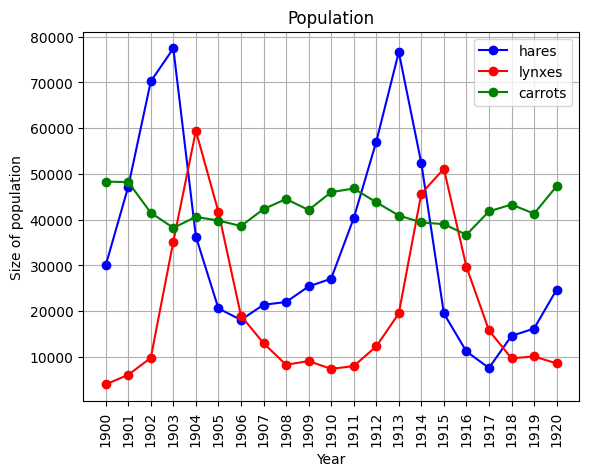

In [ ]:
colors = ["blue", "red", "green"]
def draw(arr, colors, linestyle, marker, alpha):
  for i, title in enumerate(["hares", "lynxes", "carrots"]):#!!!using cycles not to iterate through array but to make code clean
    plt.plot(arr[:,0], arr[:, i+1], label=title, color = colors[i], linestyle=linestyle, marker=marker, alpha=alpha)
  plt.xticks(arr[:,0], rotation=90)
  plt.legend()
  plt.xlabel("Year")
  plt.ylabel("Size of population")
  plt.title("Population")
  plt.grid()
draw(arr, colors, None ,"o", 1)
plt.show()

- Find which year each species had the largest population. Mark these years in the plot of populations.

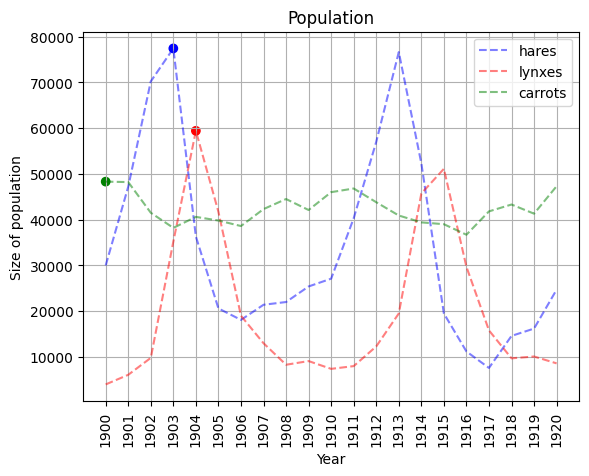

In [ ]:
maxes = np.max(arr[:,[1,2,3]], axis=0)
draw(arr, colors, "--" ,None, 0.5)
plt.scatter(arr[np.argmax(arr[:,[1,2,3]], axis=0), 0], maxes, color=colors)
plt.show()

- Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

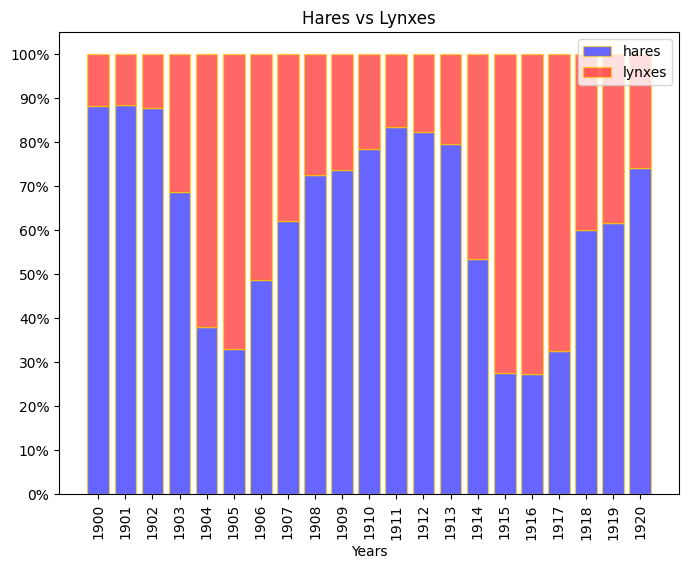

In [ ]:
total_pop = hares+lynxes
plt.figure(figsize=(8,6))
plt.bar(years, hares/total_pop*100, color ="blue",alpha=0.6, label="hares", edgecolor="gold")
plt.bar(years, lynxes/total_pop*100, bottom=hares/total_pop*100, color ="red", alpha=0.6, label="lynxes",edgecolor="gold")
plt.yticks(range(0,101,10), labels=[str(i) + "%" for i in range(0,101, 10)])
plt.xticks(years, rotation=90)
plt.xlabel("Years")
plt.title("Hares vs Lynxes")
plt.legend()
plt.show()

- Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

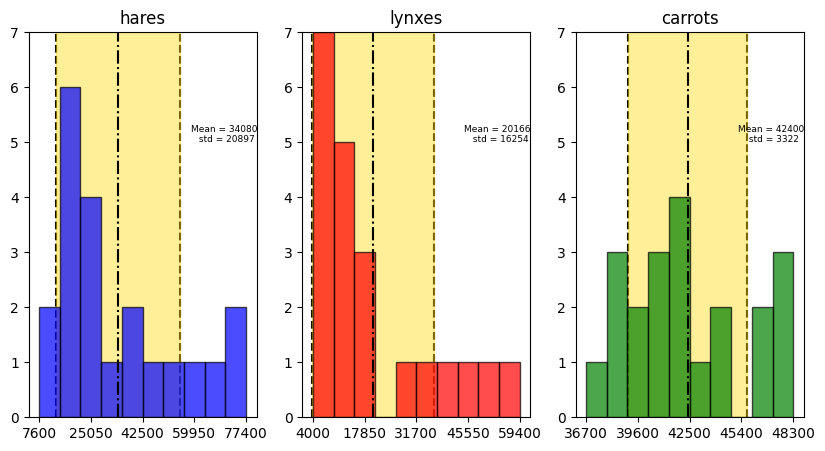

In [ ]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(10,5)
for i, title in enumerate(["hares", "lynxes", "carrots"]):#!!!using cycles not to iterate through array but to make code clean
  ax[i].hist(arr[:, i+1], bins = 10, color=colors[i], alpha=0.7, edgecolor="black",zorder=2)
  ax[i].set_yticks(range(0,8))
  ax[i].axvline(arr[:, i+1].mean() + arr[:, i+1].std(), color="black", linestyle="--",zorder=1)
  ax[i].axvline(arr[:, i+1].mean() - arr[:, i+1].std(), color="black", linestyle="--",zorder=1)
  ax[i].fill_between([arr[:, i+1].mean() - arr[:, i+1].std(), arr[:, i+1].mean() + arr[:, i+1].std()], 0, 7, color="gold", alpha=0.4,zorder=1)
  ax[i].set_xticks(np.linspace(arr[:, i+1].min(), arr[:, i+1].max(), 5))
  ax[i].text((arr[:, i+1].max() - arr[:, i+1].min())/20*18 + arr[:, i+1].min(), 5, f"Mean = {int(arr[:, i+1].mean())} \n std = {int(arr[:, i+1].std())}",
             horizontalalignment='center', fontsize=6.5)
  ax[i].set_title(title)
  ax[i].set_ylim(0,7)
  ax[i].axvline(arr[:, i+1].mean(), color="black", linestyle="-.")
plt.show()

- Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

H | H | H | H | L | L | L | H | H | H | H | H | H | H | H | L | L | L | H | H | H


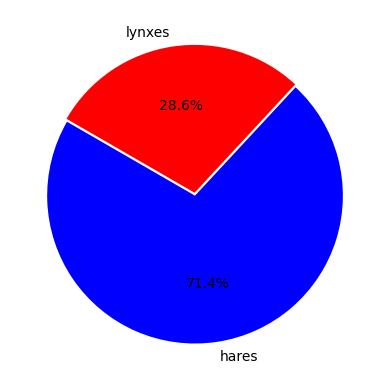

In [ ]:
pie = np.array(["H","L"])[arr[:,[1,2]].argmax(axis=1)]
print(" | ".join(pie))
plt.pie([sum(pie=="H"),sum(pie=="L")], labels=["hares", "lynxes"],explode=[0.01,0.01], autopct="%1.1f%%", colors=["blue", "red"], startangle = 150)
plt.show()

- Plot the change in the hare population and in the lynx population for each year. Find the correlation coefficient between the both time series.

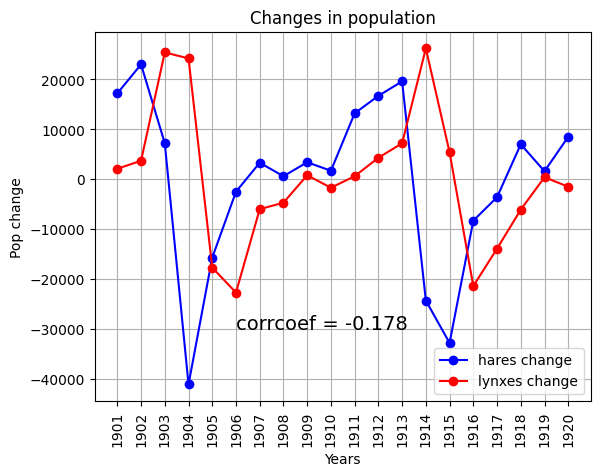

In [ ]:
plt.plot(years[1:], hares[1:]-hares[:-1], color="blue", marker="o", label="hares change")
plt.plot(years[1:], lynxes[1:]-lynxes[:-1], color="red", marker="o", label="lynxes change")
plt.xticks(years[1:], rotation=90)
plt.legend()
plt.title("Changes in population")
plt.xlabel("Years")
plt.ylabel("Pop change")
plt.grid()
plt.text(1906, -30000, f"corrcoef = {round(np.corrcoef(lynxes[1:]-lynxes[:-1], hares[1:]-hares[:-1])[0,1],3)}", fontsize=14)
plt.show()

- Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

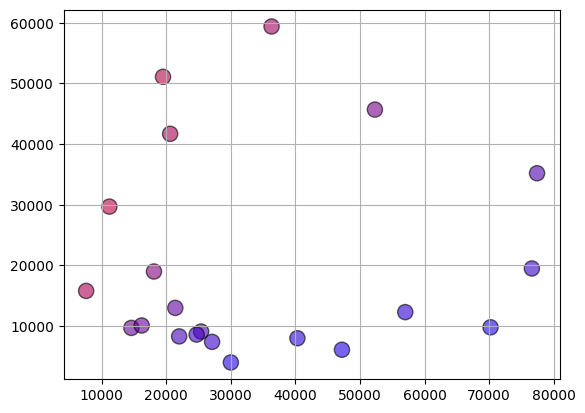

In [ ]:
#The color of the point means the proportion between hares and lynxes population size
plt.scatter(hares, lynxes, color=list(zip(lynxes/total_pop, np.zeros(shape=hares.shape[0]), hares/total_pop)), s=120, alpha=0.6, edgecolors="black")
plt.grid()
plt.show()

- Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

In [ ]:
#The prediction will be made using linear-regression like model
#Going to estimate alpha-vec using data from 1900 till 1919
import warnings
warnings.filterwarnings("ignore") #cause of fefefe from numpy
x = np.concatenate([np.concatenate([hares[-i:-i-2:-1].reshape(1,-1),
                                    lynxes[-i:-i-2:-1].reshape(1,-1),
                                    np.ones(shape=(1,1))], axis=1)
                                    for i in range(3,10)], axis=0) #making dataset

alpha = np.linalg.lstsq(x, hares[-2:-9:-1])[0] #using least squares method
prediction = np.concatenate([hares[-2:-4:-1].reshape(1,-1),
                            lynxes[-2:-4:-1].reshape(1,-1),
                             np.ones(shape=(1,1))], axis=1)@alpha #making prediction
print("The prediction is: ", prediction[0], "\n", "The true value is: ", hares[-1], "\n",
      "Ratio is: ", abs(hares[-1]-prediction[0])/hares[-1], sep="")

The prediction is: 25263.28530500884
The true value is: 24700.0
Ratio is: 0.022805073077281034
